In [88]:
import tensorflow as tf
import numpy as np

In [89]:
import pandas as pd

In [90]:
df= pd.read_csv('D:\Exploratory Project\micrograph.csv')

In [91]:
df.head()

,micrograph_id,path,micron_bar,micron_bar_units,micron_bar_px,magnification,detector,sample_key,contributor_key,primary_microconstituent
0,1,micrograph1.jpg,5,um,129,4910x,SE,42.0,2,pearlite
1,2,micrograph2.jpg,10,um,103,1964X,SE,18.0,2,spheroidite
2,4,micrograph4.jpg,10,um,129,NaN,SE,35.0,2,pearlite+spheroidite
3,5,micrograph5.jpg,5,um,129,4910X,SE,10.0,2,pearlite
4,6,micrograph6.jpg,20,um,124,1178X,SE,29.0,2,spheroidite


In [92]:
df['primary_microconstituent'].unique()

array(['pearlite', 'spheroidite', 'pearlite+spheroidite',
       'spheroidite+widmanstatten', 'network', 'martensite',
       'pearlite+widmanstatten'], dtype=object)

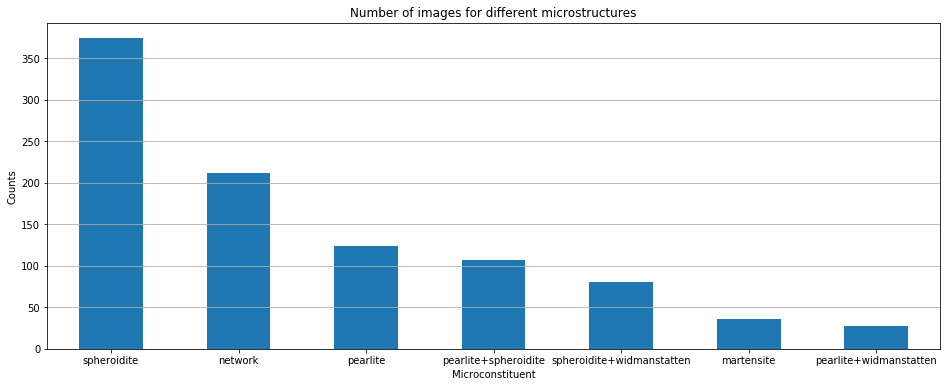

In [114]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(16, 6))
df['primary_microconstituent'].value_counts().plot.bar(rot=0)
plt.title('Number of images for different microstructures')
plt.xlabel('Microconstituent')
plt.ylabel('Counts')
plt.grid(axis='y')

In [6]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [94]:
train_file=df[0:961]
val_file=df[897:961]

In [95]:
import os,sys
folder = 'D:\Exploratory Project\micrographs'
for filename in os.listdir(folder):
       infilename = os.path.join(folder,filename)
       if not os.path.isfile(infilename): continue
       oldbase = os.path.splitext(filename)
       newname = infilename.replace('.tif', '.jpg')
       newname = infilename.replace('.png', '.jpg')        
       output = os.rename(infilename, newname)

In [96]:
datagen=ImageDataGenerator(rescale=1./255,
                          rotation_range = 20,
                          width_shift_range = 0.1,
                          height_shift_range = 0.1,
                          zoom_range=[0.5,1.0],                          
                          horizontal_flip = True)

train_set=datagen.flow_from_dataframe(dataframe=train_file, directory="D:\Exploratory Project\micrographs", 
                                            x_col='path',
                                            y_col='primary_microconstituent',
                                            class_mode='categorical',
                                            target_size=(224,224), 
                                            batch_size=32
                                            )

val_set=datagen.flow_from_dataframe(dataframe=val_file, directory="D:\Exploratory Project\micrographs", 
                                            x_col='path',
                                            y_col='primary_microconstituent',
                                            class_mode='categorical',
                                            target_size=(224,224), 
                                            batch_size=32
                                            )

Found 961 validated image filenames belonging to 7 classes.
Found 64 validated image filenames belonging to 7 classes.


In [ ]:
#to crop the details at the bottom of the image
from PIL import Image
# load image
folder = 'D:\Exploratory Project\micrographs'
for filename in os.listdir(folder):   
    image = Image.open('opera_house.jpg')
    # create a cropped image
    cropped = image.crop((100, 100, 200, 200))
    # show cropped image
    cropped.show()

In [ ]:
#augment the images and add them to the train set

In [ ]:
#bring all images to the same zoom level

In [ ]:
#if zoom level: NaN, build another computer vision application to fill the csv file with zoom levels given in the image 

In [97]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread('micrograph1.jpg')

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [99]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))

classifier.add(MaxPool2D(pool_size = (2, 2)))

classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2, 2)))

classifier.add(Conv2D(256, (3, 3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2, 2)))

classifier.add(Conv2D(256, (3, 3), activation = 'relu'))

classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2, 2)))
classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 7, activation = 'softmax'))

In [100]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 109, 109, 128)     36992     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 52, 52, 256)       295168    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 26, 26, 256)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 256)      

In [101]:
from keras import optimizers
adam = optimizers.adam(lr=0.005)
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [102]:
model=classifier
model.fit_generator(train_set,
                         steps_per_epoch = 30,
                         epochs = 20,
                         validation_data = val_set,
                         validation_steps = 1)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 30 steps, validate for 1 steps
Epoch 1/20
10/30 [=========>....................] - ETA: 1:26 - loss: 1.9019 - accuracy: 0.3611

KeyboardInterrupt: 

In [80]:
model_json = classifier.to_json()
with open("classifier.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("classifier.h5")
print("Saved model to disk")

Saved model to disk


In [86]:
#loading the model back again from saved file
import keras
from keras.models import load_model
from keras.models import model_from_json
from keras.initializers import glorot_uniform
from keras.utils import CustomObjectScope

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        model = load_model('classifier.h5')
json_file = open('classifier.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("classifier.h5")

print("Loaded model from disk")

ValueError: Cannot create group in read-only mode.